# Lab 6 - Pandas II


## Due: Thursday, February 8th, 2018,  11:59:00pm

### Submission instructions
After completing this homework, you will turn in three files via Canvas ->  Assignments -> Lab 6:
Your Notebook, named si330-lab6-YOUR_UNIQUE_NAME.ipynb and
the HTML file, named si330-lab6-YOUR_UNIQUE_NAME.html

### Name:  libby murray
### Uniqname: libbymur
### People you worked with: Rhea Cheeci


## Objectives
After completing this Lab, you should know how to:
* Web scraping using BeautifulSoup and Pandas.


In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

## Step 1

We will first import the table from the wikipedia page for the 2017 NBA Draft picks (https://en.wikipedia.org/wiki/2017_NBA_draft) using Beautiful Soup. After that we will attempt the same thing again using read_html and compare the results.

## Step 1.1 Reading HTML pages using BS4

First we will read the entire contents of the webpage using BS4 and parse it into html. It might be useful to brush up on how BS4 works. You can find the documentation here: https://www.crummy.com/software/BeautifulSoup/bs4/doc/. The noteboook accompanying the lecture (https://umich.instructure.com/courses/189228/files/folder/Week%206?preview=7162322) provides a working example of how to use BS4 to retrieve data from html pages.

**<font color="magenta">1.1.1 Get the contents of the html page from the url provided and parse it using BeautifulSoup</font>**

In [2]:
url = "https://en.wikipedia.org/wiki/2017_NBA_draft"

html = requests.get(url)
soup = BeautifulSoup(html.content, 'html.parser')

# Write your code here.

This is a big page so **do not print it out**. To get a better idea of how the table is formatted, go to the html page and inspect the table you are interested in.

There are several tables in this page. We want to read the draft pick data (the 3rd table) under the <i>Draft Selections</i> section. There are two other smaller tables before this in the same section.

The table that we are interested in looks something like this -
```
<table class="wikitable sortable" style="text-align:left">
    <tr>
        <th style="width:20px;">
            <abbr title="Draft round">
            Rnd.
            </abbr>
        </th>
       .
       .
       .
   <tr>
   .
   .
   .       
<table>
```

This gives us a good idea of what to look for using BeautifulSoup.

The first step would be to select and store the entire contents of this table in a variable using BS4. We can then use BS4 to get the headers and rows from this table, by considering both the tag and it's CSS classes. There are several BeautifulSoup methods that you can use here such as ```.select()``` or ```.find_all()```. Look up in the documentation how you would use these methods. **Which method did you pick? Explain why?**

**<font color="magenta">1.1.2 Write the code below to get the entire contents of the table.</font>**

In [3]:
# change this
draft_picks = soup.select("table.wikitable.sortable")[0]

Now that you have the table, you will need to retrieve the headers. 

**<font color="magenta">1.1.3 First find the row where the headers are stored, and then get the text using the ```.getText()``` method from all the cells in that row.</font>**

In [4]:
# write your code to and store it in this list
column_headers = []
column_header_row = draft_picks.find("tr")
for cell in column_header_row.find_all("th"):
    column_headers.append((cell.getText()))
column_headers

['Rnd.',
 'Pick',
 'Player',
 'Pos.',
 'Nationality[n 1]',
 'Team',
 'School / club team']

Next you will retrieve all the rows from the table and store it in a data structure.

**<font color="magenta">1.1.4 Create a data structure which stores the Round, Pick number, Player, Nationality and Team for all the rows.</font>**

In [5]:
# Write your code here.
data_rows = draft_picks.find_all('tr')[1:]

The data is a bit messy. For eg. the names are being repeated and concatenated together as strings.

**<font color="magenta">1.1.5 Try to retrieve the names of the top 10 draft picks. Use the ```.getText()``` to retrieve the text.</font>**

In [6]:
# write your code here

for i in range(10):
    print(data_rows[i].find_all("td")[2].select("span.sortkey")[0].getText())

Fultz, Markelle
Ball, Lonzo
Tatum, Jayson
Jackson, Josh
Fox, De'Aaron
Isaac, Jonathan
Markkanen, Lauri
Ntilikina, Frank
Smith Jr., Dennis
Collins, Zach


Now you will store all the data from the table in a data structure called ```player_data```. This is similar to what you did to get column headers, but you will need to do it for all the rows in the table.

Once you have stored the data in ```player_data```, create a new dataframe using ```player_data```, where each row corresponds to a row from the table and the column names are the column headers. You will find that your results are a bit messy such as the Player Name, some of the column headers etc.

**<font color="magenta">1.1.6 Get the data from all the rows of the table and store it into player_data</font>**

In [8]:
player_data = []
for i in range(len(data_rows)):
    temp = []
    for td in data_rows[i].find_all('td'):
        temp.append(td.getText())
    player_data.append(temp)


In [12]:
df = pd.DataFrame(player_data, columns=column_headers)
df.head()

,Rnd.,Pick,Player,Pos.,Nationality[n 1],Team,School / club team
0,1,1,"Fultz, MarkelleMarkelle Fultz",PG/SG,United States,Philadelphia 76ers (from Brooklyn via Boston)[...,Washington (Fr.)
1,1,2,"Ball, LonzoLonzo Ball",PG,United States,Los Angeles Lakers,UCLA (Fr.)
2,1,3,"Tatum, JaysonJayson Tatum",SF,United States,Boston Celtics (from Sacramento via Philadelph...,Duke (Fr.)
3,1,4,"Jackson, JoshJosh Jackson",SF,United States,Phoenix Suns,Kansas (Fr.)
4,1,5,"Fox, De'AaronDe'Aaron Fox",PG,United States,Sacramento Kings (from Philadelphia)[C],Kentucky (Fr.)


## Step 1.2

Let's try the same thing using ```read_html```. Remember that read_html will retrieve all the tables from the webpage.

**<font color="magenta">1.2.1 Use ```.read_html()``` to read the tables from the web_page. Store the correct table into the dataframe.</font>**

In [13]:
# Write your code here
dataframe = pd.read_html(url, header=0)[3]

In [14]:
dataframe.head()

,Rnd.,Pick,Player,Pos.,Nationality[n 1],Team,School / club team
0,1,1,"Fultz, MarkelleMarkelle Fultz",PG/SG,United States,Philadelphia 76ers (from Brooklyn via Boston)[...,Washington (Fr.)
1,1,2,"Ball, LonzoLonzo Ball",PG,United States,Los Angeles Lakers,UCLA (Fr.)
2,1,3,"Tatum, JaysonJayson Tatum",SF,United States,Boston Celtics (from Sacramento via Philadelph...,Duke (Fr.)
3,1,4,"Jackson, JoshJosh Jackson",SF,United States,Phoenix Suns,Kansas (Fr.)
4,1,5,"Fox, De'AaronDe'Aaron Fox",PG,United States,Sacramento Kings (from Philadelphia)[C],Kentucky (Fr.)


## Step 2

Next, you are going to analyse data from https://www.basketball-reference.com/draft/NBA_2017.html
This table is a little complicated to read, so we have provided the data as a csv file. Download it from Canvas.
The data is not complete and you will learn how to handle missing data points.

In [15]:
df = pd.read_csv('nba_draft.csv')

There are a lot of missing points in the data such as the 24th row. 

**<font color="magenta">2.1 Print out and see what that looks like.</font>**

In [16]:
# Write your code here
df.head()

,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,MP/Game,PTS/Game,TRB/Game,AST/Game
0,1,1,PHI,Markelle Fultz,University of Washington,1.0,4.0,76.0,24.0,9.0,7.0,19.0,6.0,2.3,1.8
1,1,2,LAL,Lonzo Ball,"University of California, Los Angeles",1.0,36.0,1222.0,367.0,257.0,255.0,33.9,10.2,7.1,7.1
2,1,3,BOS,Jayson Tatum,Duke University,1.0,58.0,1796.0,787.0,298.0,81.0,31.0,13.6,5.1,1.4
3,1,4,PHO,Josh Jackson,University of Kansas,1.0,56.0,1305.0,617.0,227.0,67.0,23.3,11.0,4.1,1.2
4,1,5,SAC,De'Aaron Fox,University of Kentucky,1.0,48.0,1303.0,543.0,126.0,204.0,27.1,11.3,2.6,4.3


Now you want to remove all the Nan (Not a Number) values with zero in this case. Keep in mind that this is not going to be appropriate for all the columns, such as the column for college.

**<font color="magenta">Replace all the missing values with 0 for the appropriate columns. Hint: There is a pandas method which will do this for you.</font>**

In [17]:
df.iloc[24]
df[['Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST', 'MP/Game', 'PTS/Game', 'TRB/Game', 'AST/Game']] = df[['Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST', 'MP/Game', 'PTS/Game', 'TRB/Game', 'AST/Game']].fillna(0)

## Step 3. Visualization

The data frame that we have here is multi-dimensional i.e. each row has data points which correspond to more than one dimensions (Pick, Minutes Played, Points, Rebounds, Assists, Minutes Played per Game, Points per Game, Rebounds per Game, Assists per Game). You might want to quickly check if there's any correlation / patterns between these dimensions. The easiest way to do this is to use **scatterplot matrix**.

A scatter plot matrix shows relationships among several variables taken two at a time. Scatter plot matrices can reveal a wealth of information, including dependencies such as linear correlation, clusters, and outliers. You can explore the relationship between when a player was picked and how they perform over the rest of the season along various dimensions.

You can easily implement this using seaborn. Go through this example first: https://seaborn.pydata.org/examples/scatterplot_matrix.html

Create a Scatterplot matrix for the following dimensions: 
* Pick
* Minutes Played per Game
* Points per Game
* Rebounds per Game
* Assists per Game

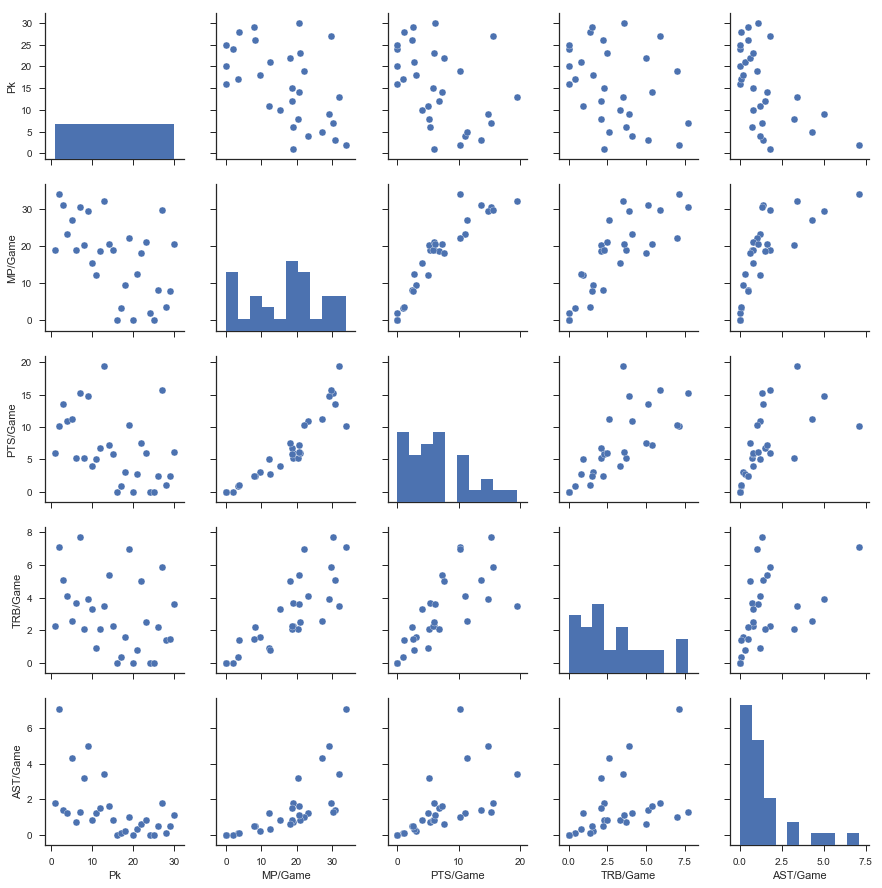

In [22]:
# Write your code to create the visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

sns.pairplot(df[['Pk', 'MP/Game', 'PTS/Game', 'TRB/Game', 'AST/Game']], dropna = True)

# Write your code to create the visualization